In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles

In [2]:
name, samples = get_samples('correlated_6d')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
samples = samples.iloc[:endpoint_true]

In [105]:
ndead = 10000
points = points_at_iteration(samples, ndead)
logL, X_mean, nk, logZdead = data(points)
d_G, _ = get_d_G_post(points, ndead)

In [106]:
X = generate_Xs(nk)
d = np.random.choice(d_G)
theta = params_from_d(logL[ndead:], X[ndead:], d)
theta, logXf_formula(theta, logZdead, X_mean[ndead])

([-74.39969735038025, 8.143285638316703, 0.022805181304167282],
 -28.427231408549737)

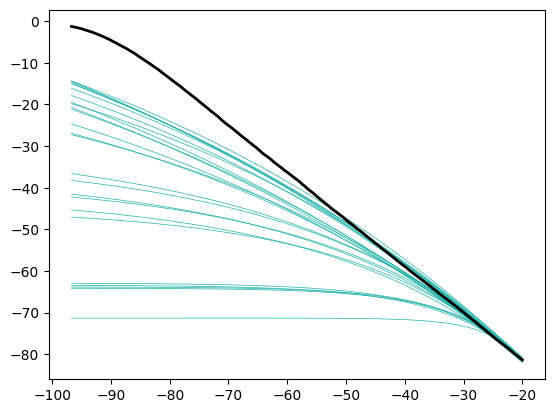

In [107]:
from aeons.likelihoods import full

for i in range(25):
    X = generate_Xs(nk)
    d = np.random.choice(d_G)
    theta = params_from_d(logL[ndead:], X[ndead:], d)
    # theta, logXf_formula(theta, logZdead, X_mean[ndead])
    logL_model = full.func(np.exp(samples.logX()), theta)
    plt.plot(samples.logX().iloc[ndead:], logL_model.iloc[ndead:], lw=.5, color='lightseagreen')
plt.plot(samples.logX().iloc[ndead:], samples.logL.iloc[ndead:], lw=2, color='black')

# Gaussian

In [108]:
name, samples = get_samples('gauss_32')
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]
samples = samples.iloc[:endpoint_true]

In [109]:
ndead = 10000
points = points_at_iteration(samples, ndead)
logL, X_mean, nk, logZdead = data(points)
d_G, _ = get_d_G_post(points, ndead)

In [110]:
X = generate_Xs(nk)
d = np.random.choice(d_G)
theta = params_from_d(logL[ndead:], X[ndead:], d)
theta, logXf_formula(theta, logZdead, X_mean[ndead])

([-235.9294969167354, 28.849514434264044, 0.01002555111038804],
 -98.33120855452795)

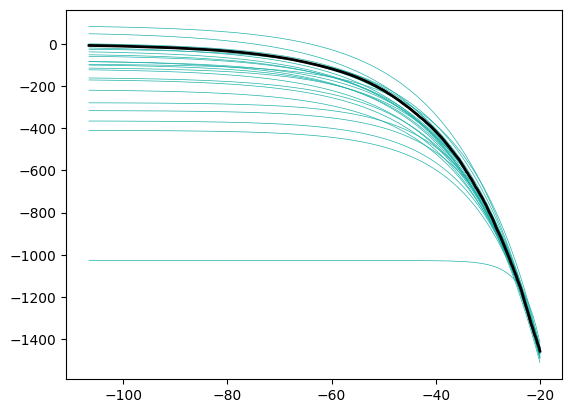

In [111]:
from aeons.likelihoods import full

for i in range(25):
    X = generate_Xs(nk)
    d = np.random.choice(d_G)
    theta = params_from_d(logL[ndead:], X[ndead:], d)
    # theta, logXf_formula(theta, logZdead, X_mean[ndead])
    logL_model = full.func(np.exp(samples.logX()), theta)
    plt.plot(samples.logX().iloc[ndead:], logL_model.iloc[ndead:], lw=.5, color='lightseagreen')
plt.plot(samples.logX().iloc[ndead:], samples.logL.iloc[ndead:], lw=2, color='black')

# Plot figure

In [5]:
figsettings()

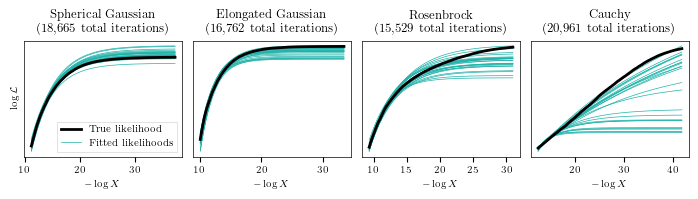

In [21]:
chains = ['gauss_8', 'elongated_6D_close', 'rosenbrock_10', 'cauchy_82']
titles = ['Spherical Gaussian', 'Elongated Gaussian', 'Rosenbrock', 'Cauchy']
fig, axs = plt.subplots(1, 4, figsize=(7, 2))

for chain, title, ax in zip(chains, titles, axs):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    endpoint_true = model.true_endpoint()
    logXf_true = samples.logX().iloc[endpoint_true]
    samples = samples.iloc[:endpoint_true]
    
    ndead = int(endpoint_true * 0.3)
    points = points_at_iteration(samples, ndead)
    logL, X_mean, nk, logZdead = data(points)
    d_G, _ = get_d_G_post(points, ndead)
    
    for i in range(25):
        X = generate_Xs(nk)
        d = np.random.choice(d_G)
        theta = params_from_d(logL[ndead:], X[ndead:], d)
        logL_model = full.func(np.exp(samples.logX()), theta)
        ax.plot(-samples.logX().iloc[ndead:], logL_model.iloc[ndead:], lw=.5, color='lightseagreen')
    ax.plot(-samples.logX().iloc[ndead:], samples.logL.iloc[ndead:], lw=2, color='black')
    ax.set_xlabel('$-\\log X$')
    ax.set_title(f'{title}\n ({len(samples):,} total iterations)')
    ax.set_yticks([])
axs[0].set_ylabel('$\\log \\mathcal{L}$')

from matplotlib.lines import Line2D
black_patch = Line2D([0], [0], color='black', lw=2)
green_patch = Line2D([0], [0], color='lightseagreen', lw=.5)
axs[0].legend([black_patch, green_patch], ['True likelihood', 'Fitted likelihoods'], loc='lower right')
fig.tight_layout()

In [2]:
name, samples = get_samples('rosenbrock_10', reduced=False)

In [5]:
%matplotlib

Using matplotlib backend: TkAgg


/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/gui/plot.py:226: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()


In [4]:
samples.gui()